SVD (Singular Value Decomposition) - rozkład według wartości osobliwych. Metoda służąca redukcji wymiaru macierzy.
SVD of a matrix isa factorization of that matrix intro three matrices. It's used, among others, for dimensionality reduction. This method reduce the number of dimensions in the feature space whilst preserving the most important structure or relationships between the variables observed in the data.

Utworzenie list zawierających macierze reprezentujące obrazy każdej wartości osobliwej oraz macierze reprezentujące skumulowane obrazy kolejnych wartości osobliwych.
Create lists that contain matrices with images for each singular value, as well as matrices with the cumulative images.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from plotnine import *

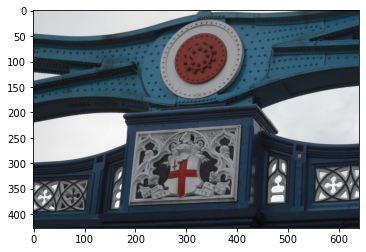

In [42]:
most = plt.imread('most.jpg', format='jpeg')
plt.imshow(most)
plt.show()

In [43]:
#przekształcenie mostu do postaci biało-czarnej
X = np.mean(most, -1)

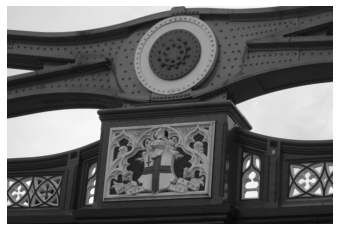

In [44]:
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [45]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

In [46]:
print(f'Macierz U ma wymiary {U.shape}')
print(f'Macierz S ma wymiary {S.shape}')
print(f'Macierz V ma wymiary {VT.shape}')

Macierz U ma wymiary (427, 427)
Macierz S ma wymiary (427, 427)
Macierz V ma wymiary (427, 640)


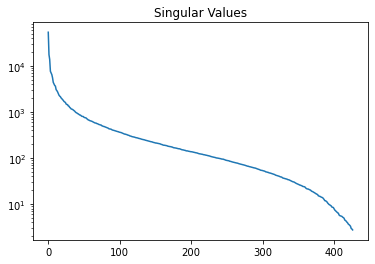

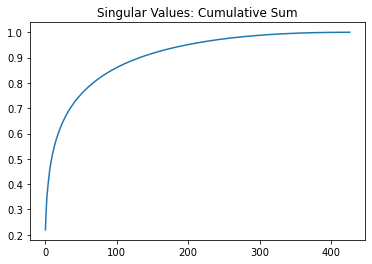

In [47]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

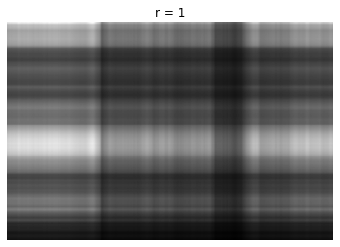

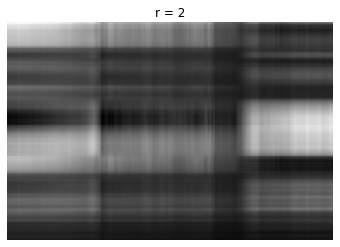

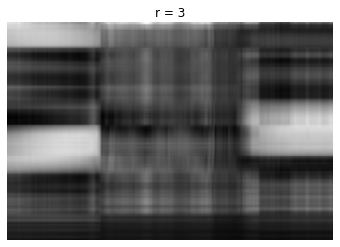

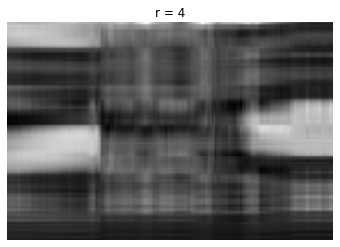

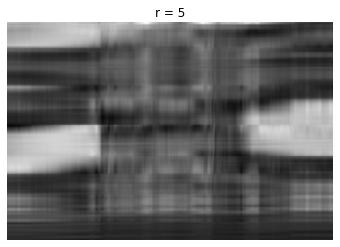

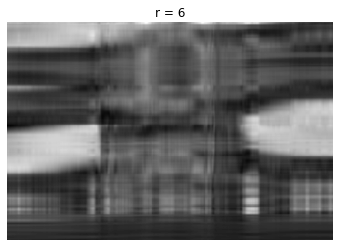

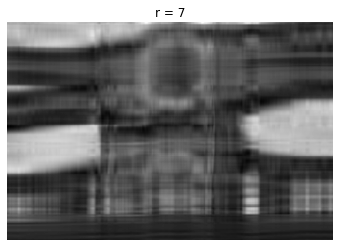

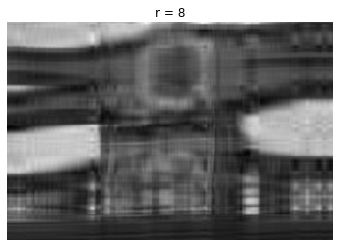

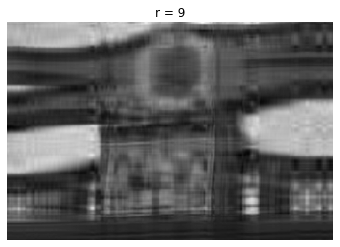

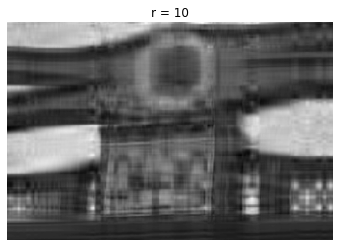

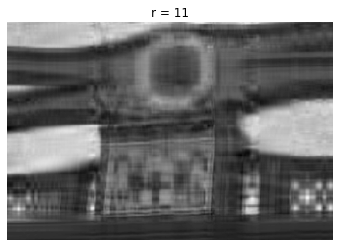

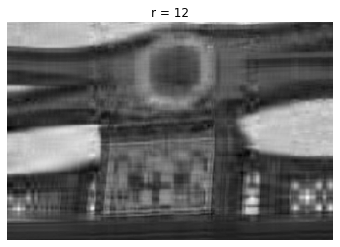

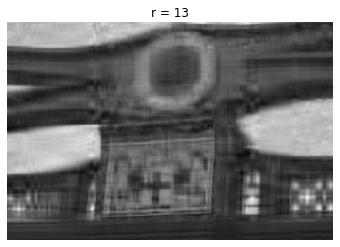

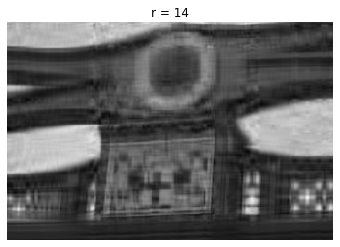

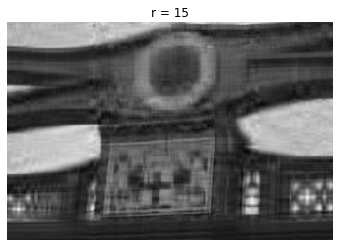

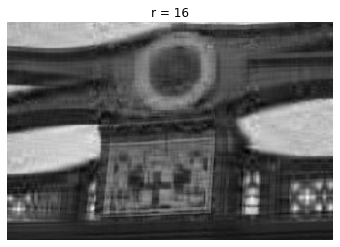

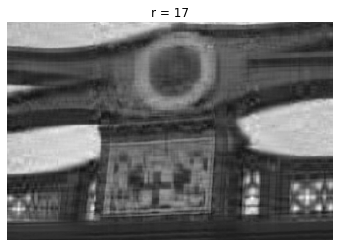

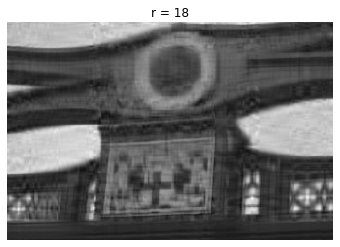

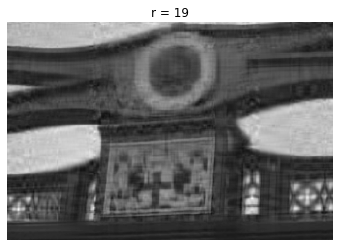

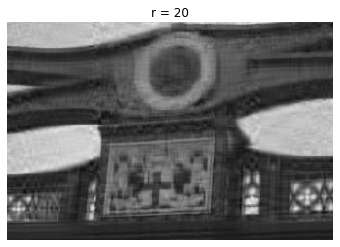

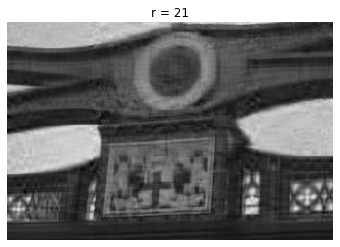

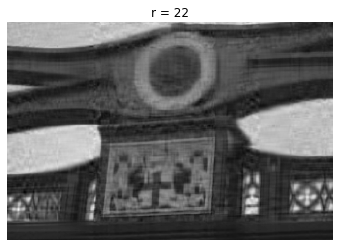

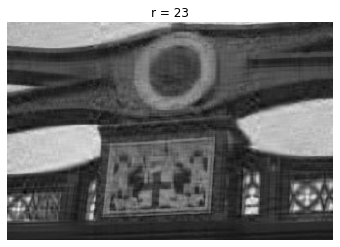

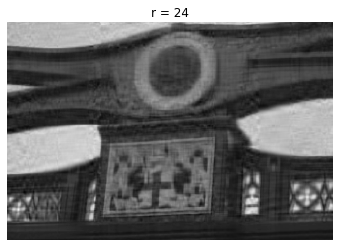

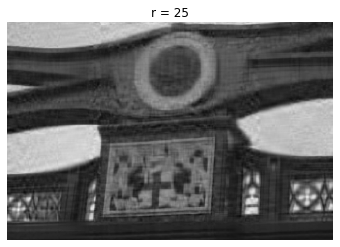

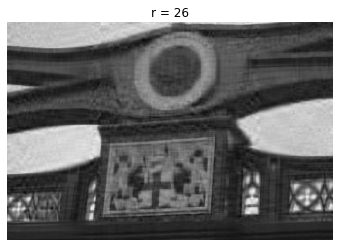

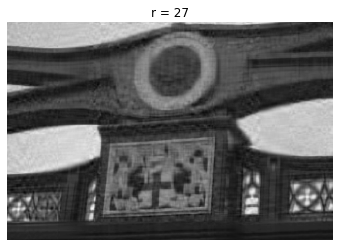

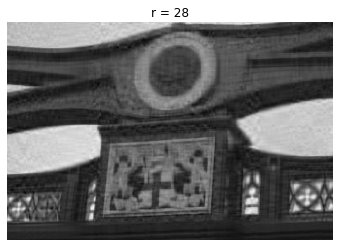

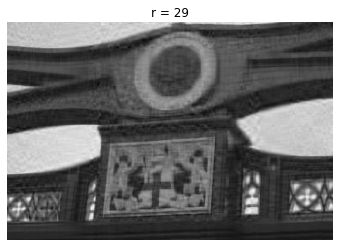

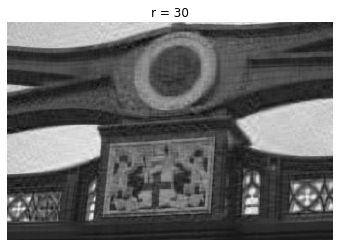

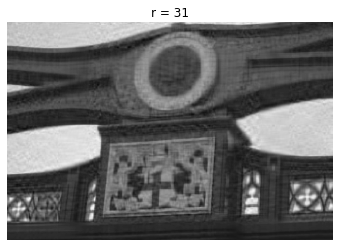

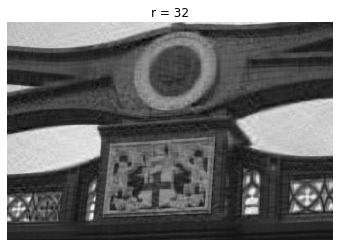

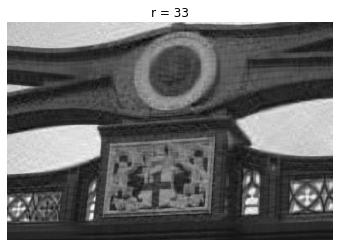

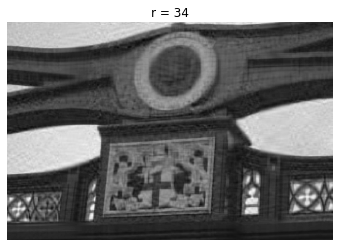

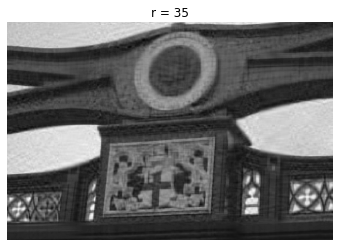

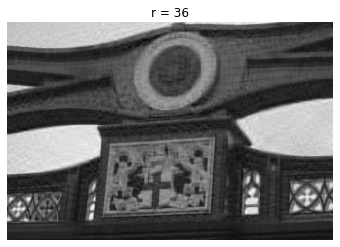

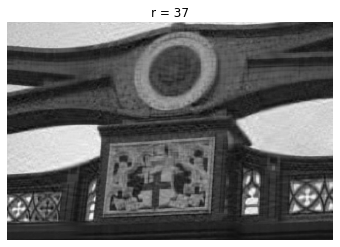

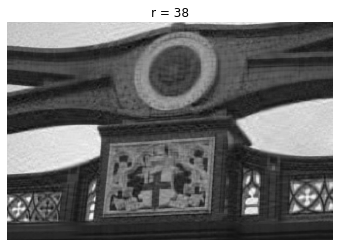

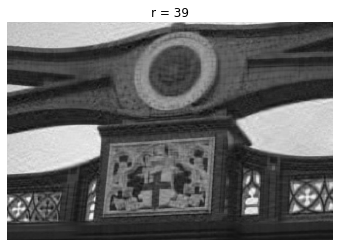

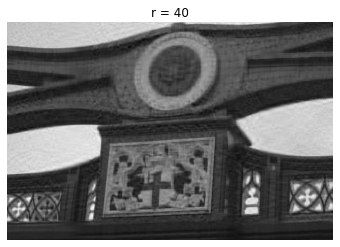

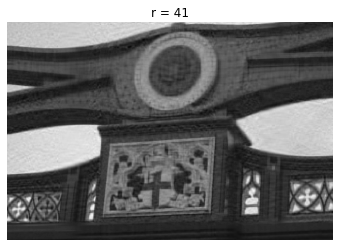

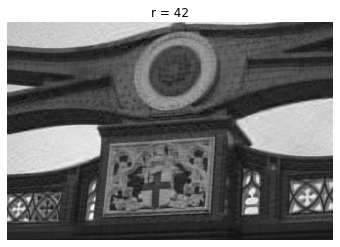

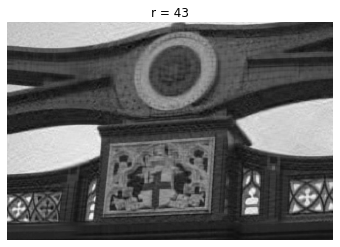

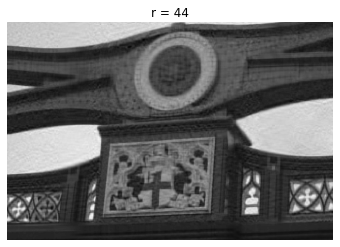

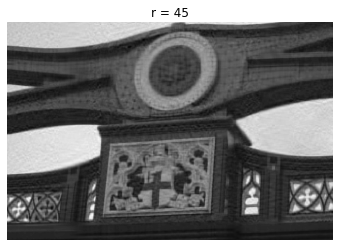

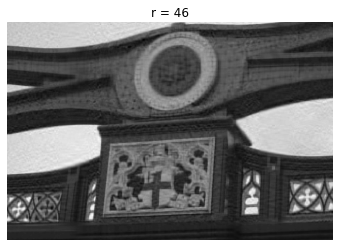

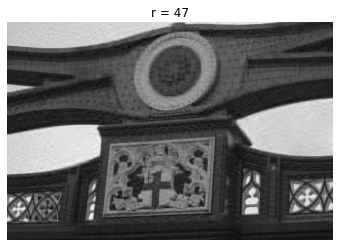

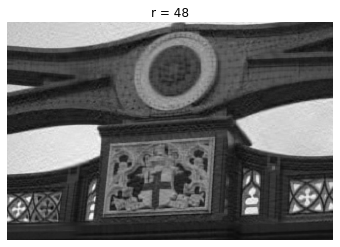

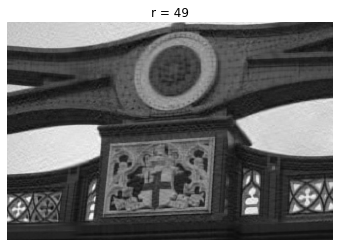

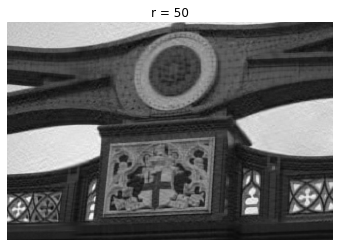

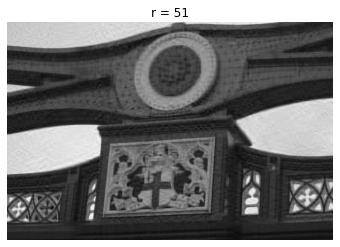

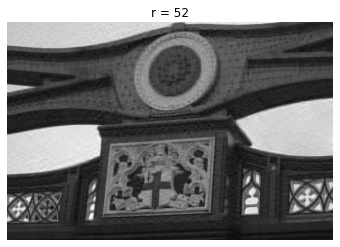

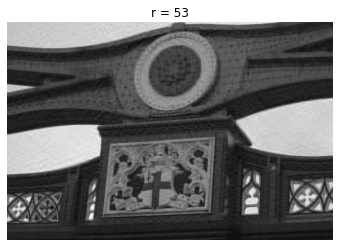

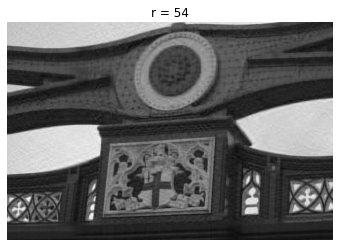

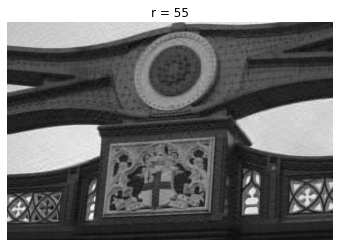

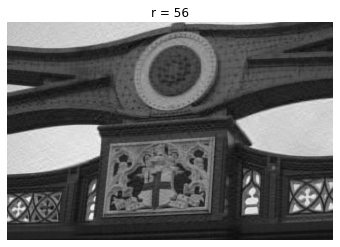

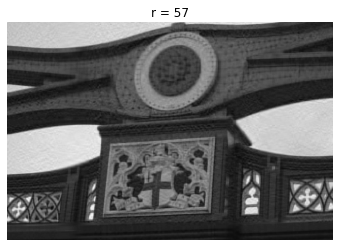

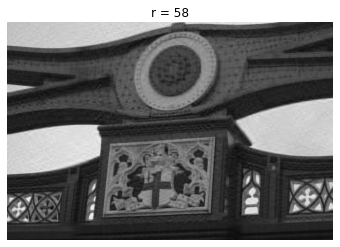

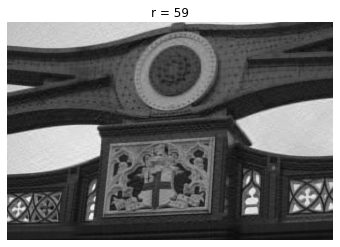

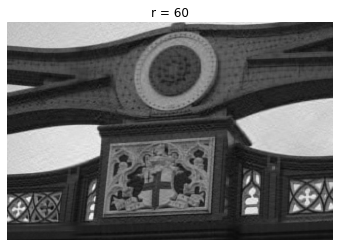

In [48]:
#skumulowane obrazy kolejnych wartości osobliwych
#cumulative images
j = 0
numbers = range(1,61,1)
for r in numbers:
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

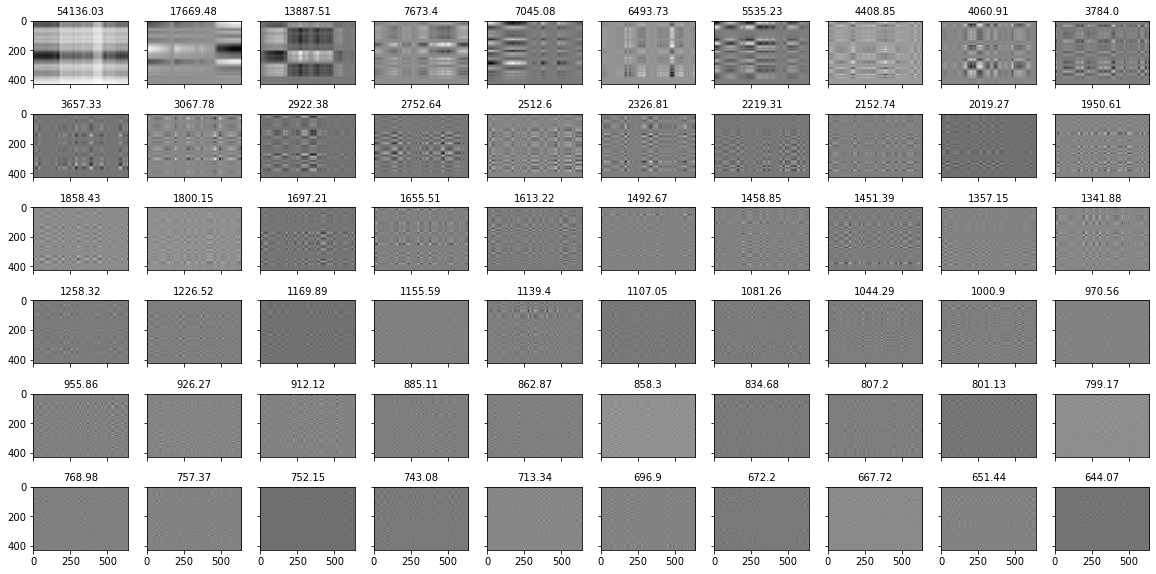

In [49]:
#macierze rezprezentujące obrazy 60 pierwszych wartości osobliwych
#images for 60 singular values
imgs = []
def plot_svd(image):
    n = 60
    U, S, V = np.linalg.svd(image)

    for i in range(n):
        imgs.append(S[i]*np.outer(U[:,i],V[i]))

    fig, axes = plt.subplots(figsize = (20,10), nrows = 6, ncols = 10, sharex=True, sharey=True)
    for i, ax in enumerate(axes.flat):
        ax.imshow(1-imgs[i], cmap='gray')
        ax.set_title(np.round(S[i],2), fontsize=10)
    plt.show()

    return U,S,V

U,S,V=plot_svd(X)